In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

datadir = '/Users/billiemeadowcroft/Dropbox/Collagen/NargessPlotting/AblationsNew/Data_all/'
plotsdir = '/Users/billiemeadowcroft/Dropbox/Collagen/NargessPlotting/AblationsNew/Plotting/Plots/'


clrs = ["#c239e8","#1f78b4","#b2df8a","#33a02c"]

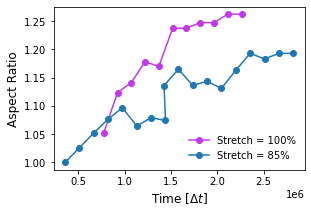

In [4]:
fig,ax = plt.subplots(1, figsize=(4.5,3))
name = 'TimeSeries_Stretch1.0.csv'
csv_path = os.path.join(datadir, name)
data = pd.read_csv(csv_path)
Time = data["Time"]
Outer_W = data["Outer_W"]
Inner_W = data["Inner_W"]
Outer_H = data["Outer_H"]
Inner_H = data["Inner_H"]

ax.plot(Time, np.divide(Outer_W,Outer_H),  color=clrs[0],marker = 'o',label ='Stretch = 100%' )

name = 'TimeSeries_Stretch0.85.csv'
csv_path = os.path.join(datadir, name)
data = pd.read_csv(csv_path)
Time = data["Time"]
Outer_W = data["Outer_W"]
Inner_W = data["Inner_W"]
Outer_H = data["Outer_H"]
Inner_H = data["Inner_H"]

ax.plot(np.divide(Time,2), np.divide(Outer_W,Outer_H), color=clrs[1],marker = 'o',label ='Stretch = 85%' )
ax.set_xlabel(r'Time [$\Delta t$]',fontsize = 12)
ax.set_ylabel(r'Aspect Ratio',fontsize = 12)
#ax.set_title('Stretch = 100%',fontsize = 14)
ax.legend(frameon=False)
fig.savefig(plotsdir+'AspectRatio_Outer.png', dpi=300, bbox_inches='tight')


In [7]:

name = 'LastFrame_StretchMultiple.csv'
csv_path = os.path.join(datadir,name)
data = pd.read_csv(csv_path)
print(data.head())
Seed = data["seed"]
Seed1data = data[data['seed'] == 1]
Seed2data = data[data['seed'] == 2]
Mean_OW = np.mean([Seed1data["Outer_W"],Seed2data["Outer_W"]], axis=0)
Mean_OH = np.mean([Seed1data["Outer_H"],Seed2data["Outer_H"]], axis=0)
Mean_IW = np.mean([Seed1data["Inner_W"],Seed2data["Inner_W"]], axis=0)
Mean_IH = np.mean([Seed1data["Inner_H"],Seed2data["Inner_H"]], axis=0)
std_OW = np.std([Seed1data["Outer_W"],Seed2data["Outer_W"]], axis=0)
std_OH = np.std([Seed1data["Outer_H"],Seed2data["Outer_H"]], axis=0)
std_IW = np.std([Seed1data["Inner_W"],Seed2data["Inner_W"]], axis=0)
std_IH = np.std([Seed1data["Inner_H"],Seed2data["Inner_H"]], axis=0)
Stretches = Seed1data["Stretch"].unique()

   Stretch  seed  Outer_W  Outer_H  Inner_W  Inner_H   Outer_R   Inner_R  \
0     0.50     1      193      184       99      120  1.048913  1.212121   
1     0.50     2      205      184       90      118  1.114130  1.311111   
2     0.75     1      222      190       86      113  1.168421  1.313953   
3     0.75     2      225      190       86      116  1.184211  1.348837   
4     1.00     1      255      202       88      127  1.262376  1.443182   

  Unnamed: 8  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  


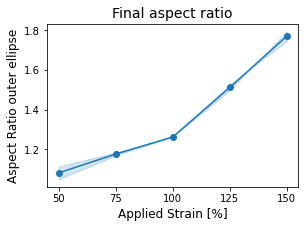

In [49]:
fig,ax = plt.subplots(1, figsize=(4.5,3))
ax.plot(Stretches*100, np.divide(Mean_OW,Mean_OH), label='Outer Width', color=clrs[1],marker = 'o')
ax.fill_between(Stretches*100, np.divide(Mean_OW+std_OW,Mean_OH+std_OH), np.divide(Mean_OW-std_OW,Mean_OH-std_OH), color=clrs[1], alpha=0.2)
ax.set_xlabel(r'Applied Strain [%]',fontsize = 12)
ax.set_ylabel(r'Aspect Ratio outer ellipse',fontsize = 12)
ax.set_xticks([50,75,100,125,150],['50','75','100','125','150'])
ax.set_title('Final aspect ratio',fontsize = 14)
fig.savefig(plotsdir+'AspectRatio_Outer_VarStretches.png', dpi=300, bbox_inches='tight')